In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys

sys.path.append(os.path.abspath("../"))
from dataset import DS_NAMES
from dataset import DS_DIMENSIONS
from utilities.figure_tools import get_latest_results_directory, make_fig_directory, load_results

results_path = "../results/vary_nrects_500t.csv"
output_dir = "./"


In [2]:
all_results = pd.read_csv(results_path).groupby(["dataset", "explainer", "n_rects"]).mean().reset_index()
# print("explainers:", list(all_results["explainer"].unique()))
# print("datasets", list(all_results["dataset"].unique()))
all_results.head()

,dataset,explainer,n_rects,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,FACETIndex,1000,500.0,NaN,0.0,0.95614,0.967742,0.882353,0.923077,1.0,0.553952,21.00,7.391001,0.324001,0.01620,20.0
1,cancer,FACETIndex,5000,500.0,NaN,0.0,0.95614,0.967742,0.882353,0.923077,1.0,0.560151,22.00,31.906002,1.240000,0.06200,20.0
2,cancer,FACETIndex,10000,500.0,NaN,0.0,0.95614,0.967742,0.882353,0.923077,1.0,0.530885,21.65,70.186754,2.798001,0.13990,20.0
3,cancer,FACETIndex,20000,500.0,NaN,0.0,0.95614,0.967742,0.882353,0.923077,1.0,0.535256,21.80,129.489459,4.911000,0.24555,20.0
4,cancer,FACETIndex,30000,500.0,NaN,0.0,0.95614,0.967742,0.882353,0.923077,1.0,0.517222,21.50,203.225736,7.962000,0.39810,20.0


In [3]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
ds_markers = {
    "cancer": "^",
    "glass": "o",
    "magic": "v",
    "spambase": "s",
    "vertebral": "D"
}
marker_size = 8
line_width = 2
marker_sizes = {
    "cancer": marker_size,
    "glass": marker_size,
    "magic": marker_size,
    "spambase": marker_size,
    "vertebral": marker_size
}

In [4]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, ylog=False, lloc=None, loc="best", lhorz=False):

    fig = plt.figure(figsize=[6.4, 4.8], frameon=True)
    ax = fig.add_subplot(1, 1, 1)
    for ds in all_results["dataset"].unique():
        is_ds = all_results["dataset"] == ds
        for expl in all_results["explainer"].unique():
            is_expl = all_results["explainer"] == expl
            matching_rows = is_ds & is_expl
            ax.plot(all_results[matching_rows][xfeature], all_results[matching_rows][yfeature], label=ds, lw=line_width, marker=ds_markers[ds], ms=marker_sizes[ds], color=ds_colors[ds])

        # title and axis labels
        if title is not None:
            plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        # legend
        if lhorz:
            plt.legend(loc=loc, ncol=len(all_results["dataset"].unique()), bbox_to_anchor=(0, 1.09, 1, 0), handletextpad=0.5, columnspacing=1, handlelength=1.5)
        else:
            plt.legend(loc=loc)
        # x and y ranges
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)
        if save_name is not None:
            plt.savefig(output_dir + save_name, bbox_inches="tight")
        # x and y scales
        if ylog:
            plt.yscale('log')
        if xlog:
            plt.xscale('log')
        plt.subplots_adjust(top=1.0)

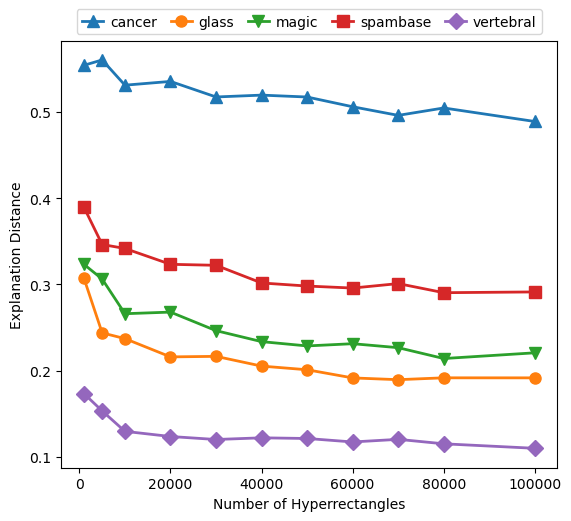

In [5]:
render_plot(xfeature="n_rects", yfeature="avg_dist", xlabel="Number of Hyperrectangles", ylabel="Explanation Distance", title=None, save_name="dist_vs_rects_500.png", loc="upper center", lhorz=True)

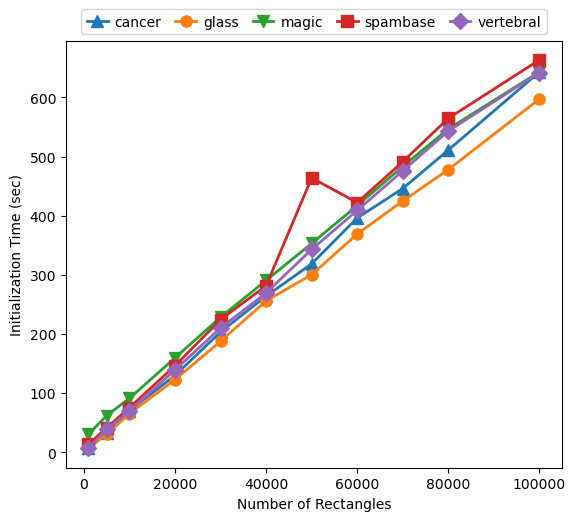

In [6]:
render_plot(xfeature="n_rects", yfeature="prep_time", xlabel="Number of Rectangles", ylabel="Initialization Time (sec)", title=None, save_name="prep_vs_rects_500.png", loc="upper center", lhorz=True)

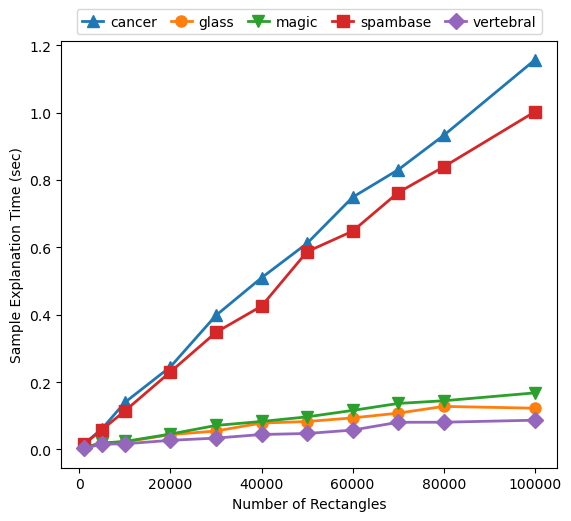

In [7]:
render_plot(xfeature="n_rects", yfeature="sample_time", xlabel="Number of Rectangles", ylabel="Sample Explanation Time (sec)", title=None, save_name="explain_vs_nrects_500", loc="upper center", lhorz=True)